# Final Project: Prediksi Pembatalan Reservasi Hotel

**By Hudzaifah Rizqi Kamil**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project Dibimbing - Hudzaifah Rizqi K/Final Project/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Dataset Understanding

**Sumber Dataset:** https://www.kaggle.com/datasets/mojtaba142/hotel-booking

**Tentang Dataset:**

Dataset ini berisi 119390 observasi untuk Hotel Kota dan Hotel Resor. Setiap observasi mewakili pemesanan hotel antara tanggal 1 Juli 2015 dan 31 Agustus 2017, termasuk pemesanan yang benar-benar diterima dan pemesanan yang dibatalkan. Dataset ini adalah data hotel yang sebenarnya, semua elemen data yang berkaitan dengan identifikasi hotel atau pelanggan telah dihapus. Empat Kolom, 'nama', 'email', 'nomor telepon' dan 'kartu kredit' telah dibuat dan ditambahkan secara artifisial ke dalam dataset. Data ini aslinya berasal dari artikel Hotel Booking Demand Datasets, yang ditulis oleh Nuno Antonio, Ana Almeida, dan Luis Nunes untuk Data in Brief, Volume 22, Februari 2019.

**Penjelasan Kolom Dataset:**

0.   hotel                           : Kumpulan data berisi informasi pemesanan dua hotel. Salah satu hotel adalah hotel resor dan yang lainnya adalah hotel kota.
1.   is_canceled                     : Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).
2.   lead_time                       : Jumlah hari yang berlalu antara tanggal pemesanan yang dimasukkan ke PMS dan tanggal kedatangan.
3.   arrival_date_year               : Tahun tanggal kedatangan
4.   arrival_date_month              : Bulan tanggal kedatangan dengan 12 kategori (Januari hingga Desember)
5.   arrival_date_week_number        : Nomor minggu dari tanggal kedatangan (dalam satu tahun hingga 53 minggu)
6.   arrival_date_day_of_month       : Tanggal dalam bulan dari tanggal kedatangan (hingga 31 hari)
7.   stays_in_weekend_nights         : Jumlah malam akhir pekan (Sabtu atau Minggu) yang ditinggali tamu atau dipesan untuk menginap di hotel
8.   stays_in_week_nights            : Jumlah malam dalam seminggu (Senin hingga Jumat) yang ditinggali tamu atau dipesan untuk menginap di hotel BO dan BL/Dihitung dengan menghitung jumlah malam dalam seminggu
9.   adults                          : Jumlah orang dewasa
10.  children                        : Jumlah anak-anak
11.  babies                          : Jumlah bayi
12.  meal                            : BB-Bed dan Breakfast (jenis akomodasi yang menyediakan kamar untuk bermalam dan sarapan di pagi hari). B&B biasanya dikelola oleh keluarga atau tim kecil yang tinggal di lokasi tersebut.
13.  country                         : Negara asal customer
14.  market_segment                  : Penunjukan segmen pasar. Dalam kategori, istilah “TA” berarti “Agen Perjalanan” dan “TO” berarti “Operator Tur”
15.  distribution_channel            : Saluran distribusi pemesanan. Istilah “TA” berarti “Agen Perjalanan” dan “TO” berarti “Operator Tur”
16.  is_repeated_guest               : Nilai yang menunjukkan apakah nama pemesanan berasal dari tamu yang berulang (1) atau tidak (0)
17.  previous_cancellations          : Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini
18.  previous_bookings_not_canceled  : Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini
19.  reserved_room_type              : Kode tipe kamar yang dipesan. Kode ditampilkan sebagai ganti penunjukan untuk alasan anonimitas
20.  assigned_room_type              : Kode untuk tipe kamar yang ditetapkan untuk pemesanan. Terkadang tipe kamar yang ditetapkan berbeda dari tipe kamar yang dipesan karena alasan operasional hotel (misalnya pemesanan berlebih) atau atas permintaan pelanggan. Kode disajikan sebagai ganti penunjukan demi alasan anonimitas
21.  booking_changes                 : Jumlah perubahan/amendemen yang dibuat pada pemesanan sejak pemesanan dimasukkan pada PMS (Property Management System) hingga saat check-in atau pembatalan
22.  deposit_type                    : 'No Deposit' - tidak ada deposit yang dibuat; 'Non Refund' - deposit dibuat dengan nilai total biaya menginap; 'Refundable' - deposit dibuat dengan nilai di bawah total biaya menginap.
23.  agent                           : ID agen perjalanan yang membuat pemesanan
24.  company                         : ID perusahaan/entitas yang membuat pemesanan atau yang bertanggung jawab untuk membayar pemesanan. ID disajikan sebagai ganti penunjukan demi alasan anonimitas
25.  days_in_waiting_list            : Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan
26.  customer_type                   : 'Group' - saat pemesanan dikaitkan dengan grup; 'Transient' - saat pemesanan bukan bagian dari grup atau kontrak, dan tidak dikaitkan dengan pemesanan sementara lainnya; 'Transient-party' - saat pemesanan bersifat sementara, tetapi terkait dengan setidaknya pemesanan sementara lainnya
27.  adr                             : Tarif Harian Rata-rata (Dihitung dengan membagi jumlah semua transaksi penginapan dengan jumlah total malam menginap)
28.  required_car_parking_spaces     : Jumlah tempat parkir mobil yang dibutuhkan oleh pelanggan
29.  total_of_special_requests       : Jumlah permintaan khusus yang dibuat oleh pelanggan (misalnya tempat tidur twin atau lantai tinggi)
30.  reservation_status              : 'Check-Out' - pelanggan telah check-in tetapi sudah meninggalkan hotel; 'No-Show' - pelanggan tidak check-in dan tidak memberi tahu hotel tentang alasannya

31.  reservation_status_date         : Tanggal saat status terakhir ditetapkan. Variabel ini dapat digunakan bersama dengan ReservationStatus untuk mengetahui kapan pemesanan dibatalkan atau kapan pelanggan check-out dari hotel
32.  name                            : Nama customer (tidak asli)
33.  email                           : Email customer (tidak asli)
34.  phone-number                    : Nomor Telepon customer (tidak asli)
35.  credit_card                     : Nomor Kartu Kredit customer (tidak asli)


## Project Objectives (Business Understanding + Goals)

Dalam dataset yang saya gunakan terdapat banyak sekali informasi yang bisa didapatkan dari hasil analisis baik melalui EDA, Feature Engineering maupun pembentukan model machine learning. Namun dalam pengerjaan ini saya ingin berfokus pada sebuah tujuan yakni:

- **Pernyataan Masalah:** Masalah yang ingin diselesaikan terkait dengan Pembatalan reservasi pelanggan hotel. Tujuan utama adalah meminimalkan jumlah pembatalan yang terjadi, sehingga dapat membantu meningkatkan tingkat hunian kamar dan pendapatan hotel.

- **Pihak yang terpengaruh:** Tentu dalam permasalan ini terdapat potensi beberapa pihak yang terpengaruh antara lain
  
  1. Hotel
  - Kerugian Finansial: Kamar yang kosong artinya kehilangan pendapatan potensial.
  - Efisiensi Operasional: Perubahan rencana operasional akibat pembatalan mendadak dapat mengganggu kinerja staf hotel dan meningkatkan biaya.
  - Tingkat Reputasi: Tingkat pembatalan yang tinggi dapat memengeruhi reputasi hotel dan mengurangi kepercayaan calon tamu.
  2. Tamu/Pelanggan
  - Ketidaknyamanan: Jika pembatalan dilakukan oleh pihak hotel (misal overbooking) dapat menyebabkan ketidaknyamanan pada tamu.
  - Kehilangan waktu: Tamu harus mencari alternatif akomodasi lainnya yang mungkin kesulitan dalam proses tersebut.
  3. Platform Reservasi
  - Penurunan pendapatan: Pembatalan dapat mengurangi komisi yang diterima dari transaksi melalui platfrom.
  - Kerusakan reputasi: Jika banyak hotel dalam platfrom memiliki tingkat pembatalan tinggi, maka dapat memengaruhi reputasi platfrom.

- **Skala masalah**
  1. Waktu/Musim: Adanya waktu/musim tertentu yang mungkin mengalami sepi tamu
  2. Lokasi: Terdapat keunggulan tersendiri dari masing-masing lokasi hotel baik dari
    - City Hotel yang terletak di pusat kota, biasanya di kota-kota besar. City hotel sering digunakan oleh para pebisnis dan dikenal sebagai hotel transit. Fasilitas yang ditawarkan biasanya menunjang para pebisnis seperti ruang rapat, meja kerja, dan lainnya atau
    - Resort Hotel yang terletak di kawasan wisata dan rekreasi. Resort hotel difungsikan untuk para wisatawan yang bertujuan berwisata. Resort hotel biasanya berlokasi jauh dari pusat kota dan menawarkan lebih banyak fasilitas untuk tamunya, termasuk pilihan restoran mewah, bar, klub malam dan kasino, layanan spa dan salon lengkap, dan toko ritel eksklusif.
  3. Kebijakan Pembatalan: Kebijakan yang terlalu ketat maupun terlalu fleksibel dapat memengeruhi tingkat pembatalan. Terutama untuk Resort Hotel yang lebih sering dipesan saat liburan daripada City Hotel yang biasanya hanya digunakan untuk transit dan dipesan secara langsung di hari menginap.

- **Mengapa penting untuk diselesaikan?** Dengan menyelesaikan/meminimalkan permasalan ini dapat membantu:
  - meningkatkan hunian kamar dan tingkat pendapatan,
  - membantu membentuk perencanaan yang efisien dan menekan biaya operasional,
  - meningkatkan kepuasan tamu dan mendorong loyalitas,
  - memperkuat keunggulan posisi kompetitif dengan mengelola insiden pembatalan dengan baik.

- **Tujuan Bisnis:** Membantu mengurangi potensi pembatalan reservasi hotel untuk bulan-bulan selanjutnya. Beberapa matrix evaluasi yang digunakan **(Lebih Prioritas)**:
  1. Accuracy: Mengukur proporsi prediksi yang benar secara keseluruhan. Namun, kurang relevan jika data tidak seimbang (misalnya, jumlah pembatalan jauh lebih sedikit).
  2. **Precision:** Mengukur proporsi prediksi positif (pembatalan) yang benar. Penting jika biaya false positive tinggi (misalnya, menawarkan insentif kepada tamu yang tidak akan membatalkan). Tingkat presisi yang tinggi membantu hotel menargetkan penawaran khusus kepada tamu yang benar-benar berisiko membatalkan, meningkatkan kemungkinan mereka untuk tetap melanjutkan reservasi. Hotel juga bisa mengalokasikan sumber daya layanan pelanggan secara lebih efisien, dengan fokus pada tamu yang paling membutuhkan perhatian.
  3. **Recall:** Mengukur proporsi data positif yang benar-benar diklasifikasikan sebagai positif. Penting jika biaya false negative tinggi (misalnya, tidak mengantisipasi pembatalan dan kehilangan pendapatan). Dengan recall yang tinggi, hotel dapat proaktif dalam mengidentifikasi dan mengatasi masalah yang mungkin menyebabkan tamu membatalkan reservasi, seperti masalah dengan kamar atau layanan. Hotel juga dapat lebih baik dalam mengelola kapasitas kamar, mengurangi risiko overbooking atau underbooking.
  4. F1-Score: Rata-rata harmonik dari precision dan recall. Memberikan keseimbangan antara precision dan recall.

## Data Preprocessing

In [ ]:
df.shape

(119390, 36)

In [ ]:
numerical_columns = []
for x in df.columns:
    if df[x].dtype in ['int', 'float']:
        if x != 'EmployeeNumber':
            numerical_columns.append(x)

In [ ]:
# Mencari kolom data numerik
df_numerik = df[numerical_columns]
df_numerik.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
# Mencari kolom data non-numerik
df_non_numerik = df.select_dtypes(exclude=['number']).columns.tolist()
df_non_numerik

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Missing Value

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Karena dalam tujuan analisis ini tidak memerlukan kolom data 'agent' dan 'company' maka dapat didrop saja untuk keseluruhan kolom. Untuk kolom yang mengandung privasi seperti 'name','email','phone-number'dan'credit_card' saya biarkan karena mungkin ada pelanggan yang sama memesan meskipun menggunakan nama yang sama di tanggal yang berbeda (mengingat keempat kolom ini diubah dengan AI (dummy) jadi tidak bisa langsung dianggap sebagai data duplikat). Sedangkan untuk index yang terdapat missing value pada kolom 'children' dan 'country' dapat dihapus karena hanya sedikit saja informasi yang dihapus.

In [ ]:
# Drop kolom agent dan company
df.drop(columns=['agent','company'], axis=1, inplace=True)
df.dropna(subset=['children'], inplace=True)

# Hitung modus dari kolom country
modus = df['country'].mode()[0]

# Isi nilai yang hilang dengan modus
df['country'].fillna(modus, inplace=True)

<ipython-input-10-a5293494a333>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(modus, inplace=True)


In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### Duplicate Data

In [ ]:
df.duplicated().sum()

0

Saya menyimpulkan bahwa data duplikasi dihasilkan ketika seluruh baris kolom sama. Untuk perwakilan index saya menggunakan nama pelanggan atau data privasi lainnya dengan asumsi nama yang sama bisa memesan tanggal kedatangan yang berbeda (meskipun nantinya di cancel atau untuk orang lain) atau dalam tanggal tertentu bisa ada pemesanan dengan nama yang sama namun spesifikasi pemesannya dalam kolom fitur lainnya berbeda (bisa saja atas nama orang yang sama digunakan oleh pelanggan lain juga).

In [ ]:
df.shape

(119386, 34)

### Outliers

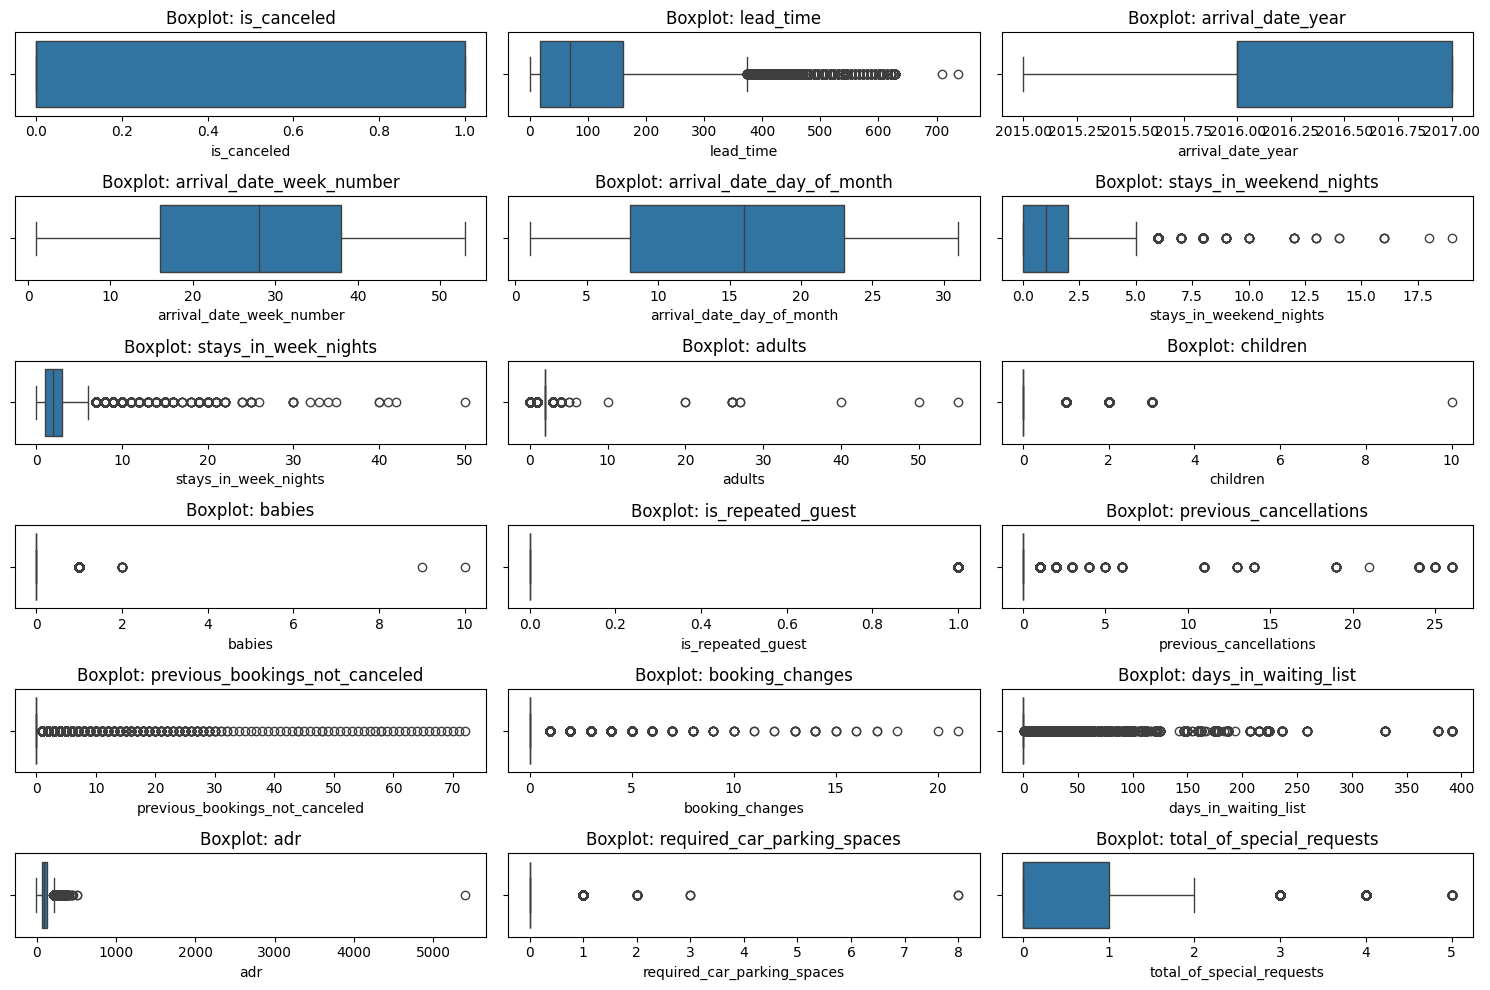

In [ ]:
# Pilih kolom numerik dari dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Menghitung jumlah baris dan kolom yang dibutuhkan untuk subplot
num_cols = 3  # Jumlah kolom subplot
num_rows = int(np.ceil(len(numerical_columns) / num_cols))  # Jumlah baris subplot

# Membuat Boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))  # Menyesuaikan ukuran grafik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Menentukan grid plot dengan num_rows dan num_cols
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()  # Agar layout tidak tumpang tindih

plt.show()

Banyak kolom data yang menghasilkan outlier, namun karena dataset diambil berdasarkan observasi asli dan tidak menggunakan data dummy, maka dapat dipertimbangkan bahwa nilai outlier tersebut juga merupakan data asli yang didapatkan dari kondisi nyata.

Sebelum menganalisis objek permasalahan yang ingin diselesaikan ada beberapa hal yang bisa menjadi asumsi dan hypothesis awal terkait faktor penyebab terjadinya pembatalan reservasi hotel:

- **Asumsi:**
  1. Antara tahun 2015 dan 2017, tidak ada kejadian penting atau insiden tak terduga yang berdampak besar pada data yang dipertimbangkan.
  2. Faktor paling signifikan yang memengaruhi perolehan pendapatan adalah terjadinya pembatalan pemesanan.
  3. Pembatalan mengakibatkan kamar tidak terisi selama durasi pemesanan awal.
  4. Klien biasanya membuat reservasi hotel di tahun yang sama saat mereka membatalkannya.

- **Hypothesis:**
  1. Pembatalan lebih banyak terjadi saat harga lebih tinggi.
  2. Saat daftar tunggu lebih panjang, pelanggan cenderung lebih sering membatalkan reservasi.
  3. Mayoritas klien datang dari agen perjalanan offline untuk melakukan reservasi.

### EDA
Fokus utama dengan kolom fitur: Mencari faktor-faktor yang mungkin menyebabkan adanya pembatalan reservasi.
1. Mencari perbandingan jumlah tidak pembatalan dan terjadi pembatalan
2. Tingkat pembatalan berdasarkan jenis hotel
3. Tingkat pembatalan berdasarkan lama delay waktu dari pemesanan hingga kedatangan
4. Tingkat pembatalan berdasarkan lama waktu tunggu
5. Tingkat pembatalan berdasarkan segment pasar
6. Analisis Jumlah Pembatalan per Bulan (Juli 2015 - Agustus 2017) + ADR
7. Analisis Jumlah Pembatalan dari asal negara pelanggan

In [ ]:
# Memeriksa seluruh unique value pada tiap kolom kategorikal
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [ ]:
df2 = df.copy()

In [ ]:
# Jumlah pembatalan reservasi keseluruhan
cancel_count = df2['is_canceled'].value_counts()
cancel_count

,count
is_canceled,
0,75166
1,44220


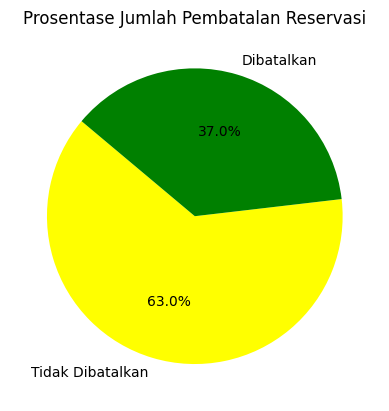

In [ ]:
plt.pie(cancel_count, labels=['Tidak Dibatalkan', 'Dibatalkan'], autopct='%1.1f%%', colors=['yellow', 'green'], startangle=140)
plt.title('Prosentase Jumlah Pembatalan Reservasi')
plt.show()

Data target pembatalan reservasi lebih di dominasi oleh bagian tidak membatalkan daripada target yang ingin dicari yakni membatalkan (Data imbalanced).

In [ ]:
# Jumlah pembatalan berdasarkan jenis hotel
cancel_hotel = df2.groupby('hotel')['is_canceled'].value_counts()
cancel_hotel

hotel         is_canceled
City Hotel    0              46228
              1              33098
Resort Hotel  0              28938
              1              11122
Name: count, dtype: int64

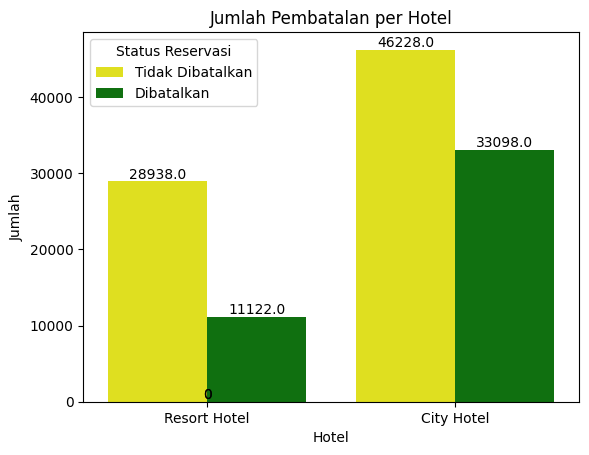

In [ ]:
sns.countplot(x='hotel', hue='is_canceled', data=df2, palette=['yellow','green'])
plt.title('Jumlah Pembatalan per Hotel')
plt.xlabel('Hotel')
plt.ylabel('Jumlah')
plt.legend(title='Status Reservasi', labels=['Tidak Dibatalkan', 'Dibatalkan'])
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Jumlah pembatalan lebih banyak dilakukan pada City_Hotel yang berada di pusat kota dimana umumnya hanya dipergunakan untuk tempat menginap sementara atau hanya untuk transit. Sedangkan Resort_Hotel lebih sering dipesan jauh hari sebelumnya dan berada di lokasi tempat hiburan atau pariwisata.

In [ ]:
# Jumlah pembatalan berdasarkan delay waktu pemesanan hingga kedatangan
cancel_lead_time = df2.groupby('lead_time')['is_canceled'].value_counts()
cancel_lead_time

lead_time  is_canceled
0          0              5915
           1               430
1          0              3139
           1               319
2          0              1856
                          ... 
622        1                17
626        1                30
629        1                17
709        0                 1
737        0                 1
Name: count, Length: 887, dtype: int64

In [ ]:
# Buat kategori lama waktu jeda antara pemesanan ke hari kedatangan
df2['lead_time_category'] = pd.cut(df2['lead_time'], bins=[0, 7, 14, 30, 60, float('inf')],
                                  labels=['0-7 hari', '8-14 hari', '15-30 hari', '31-60 hari', '>60 hari'])

# Kelompokkan data dan hitung jumlah pembatalan
cancel_hotel_time = df2.groupby(['hotel', 'lead_time_category', 'is_canceled']).size().reset_index(name='count')

# Filter hanya pembatalan (is_canceled=1)
cancel_hotel_time = cancel_hotel_time[cancel_hotel_time['is_canceled'] == 1]

# Urutkan dan ambil 5 teratas
top_10_cancels = cancel_hotel_time.sort_values(by='count', ascending=False).head(10)

top_10_cancels

<ipython-input-22-3f2b6632dae5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_hotel_time = df2.groupby(['hotel', 'lead_time_category', 'is_canceled']).size().reset_index(name='count')


,hotel,lead_time_category,is_canceled,count
9,City Hotel,>60 hari,1,23295
19,Resort Hotel,>60 hari,1,7570
7,City Hotel,31-60 hari,1,4608
5,City Hotel,15-30 hari,1,2747
17,Resort Hotel,31-60 hari,1,1566
3,City Hotel,8-14 hari,1,1132
1,City Hotel,0-7 hari,1,1043
15,Resort Hotel,15-30 hari,1,990
11,Resort Hotel,0-7 hari,1,426
13,Resort Hotel,8-14 hari,1,413


Dari data tersebut diketahui bahwa pembatalan reservasi lebih banyak terjadi ketika telah melewati lebih dari satu sampai dua bulan rentang antara pemesanan hingga tanggal kedatangan. Dan pembatalan reservasi cenderung lebih sering terjadi pada city hotel sedangkan pada resort hotel banyak terjadi pembatalan hingga dua bulan lebih sebelum tanggal kedatangan dan beberapa minggu pertama.

catatan*:
- pd.cut: Membuat kategori lama waktu tunggu berdasarkan rentang yang ditentukan.

In [ ]:
# Jumlah pembatalan berdasarkan lama waktu tunggu
cancel_days_in_waiting_list = df2.groupby('days_in_waiting_list')['is_canceled'].value_counts().reset_index()
cancel_days_in_waiting_list

,days_in_waiting_list,is_canceled,count
0,0,0,73827
1,0,1,41861
2,1,0,9
3,1,1,3
4,2,0,4
...,...,...,...
198,330,0,14
199,330,1,1
200,379,1,9
201,379,0,6


Dari hasil ini mengindikasikan bahwa pembatalan lebih banyak dilakukan oleh pelanggan itu sendiri. Karena dari hasil ini menjelaskan bahwa setiap pelanggan yang melakukan reservasi kamar dapat langsung terdata dan dikonfirmasi dengan ketersedian kamar hotel yang diinginkan (persediaan kamar seimbang dengan permintaan reservasi).

In [ ]:
# Buat kategori lama waktu jeda untuk waiting list
df2['waiting_time_category'] = pd.cut(df2['days_in_waiting_list'], bins=[0, 7, 14, 30, 60, float('inf')],
                                  labels=['0-7 hari', '8-14 hari', '15-30 hari', '31-60 hari', '>60 hari'])

# Kelompokkan data dan hitung jumlah pembatalan
cancel_hotel_wait = df2.groupby(['hotel', 'waiting_time_category', 'is_canceled']).size().reset_index(name='count')

# Filter hanya pembatalan (is_canceled=1)
cancel_hotel_wait = cancel_hotel_wait[cancel_hotel_wait['is_canceled'] == 1]

# Urutkan dan ambil 5 teratas
top_10_cancels = cancel_hotel_wait.sort_values(by='count', ascending=False).head(10)

top_10_cancels

<ipython-input-24-263a79c092b6>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_hotel_wait = df2.groupby(['hotel', 'waiting_time_category', 'is_canceled']).size().reset_index(name='count')


,hotel,waiting_time_category,is_canceled,count
7,City Hotel,31-60 hari,1,1058
9,City Hotel,>60 hari,1,842
5,City Hotel,15-30 hari,1,313
1,City Hotel,0-7 hari,1,76
3,City Hotel,8-14 hari,1,53
19,Resort Hotel,>60 hari,1,7
17,Resort Hotel,31-60 hari,1,5
11,Resort Hotel,0-7 hari,1,3
13,Resort Hotel,8-14 hari,1,1
15,Resort Hotel,15-30 hari,1,1


Untuk pembatalan reservasi berdasarkan waiting list dimana pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan oleh pihak hotel. Dari hasil ini lebih di domnasi oleh city hotel dimana kemungkinan selalu penuh oleh pelanggan lain atau tidak tersedianya kamar sesuai jumlah permintaan sehingga harus menunggu pihak hotel terkait untuk memastikan ketersediaan kamar.

In [ ]:
# Jumlah pembatalan berdasarkan channel distribusi
cancel_segment = df2.groupby('market_segment')['is_canceled'].value_counts()
cancel_segment

market_segment  is_canceled
Aviation        0                185
                1                 52
Complementary   0                646
                1                 97
Corporate       0               4303
                1                992
Direct          0              10672
                1               1933
Groups          1              12097
                0               7714
Offline TA/TO   0              15908
                1               8311
Online TA       0              35738
                1              20738
Name: count, dtype: int64

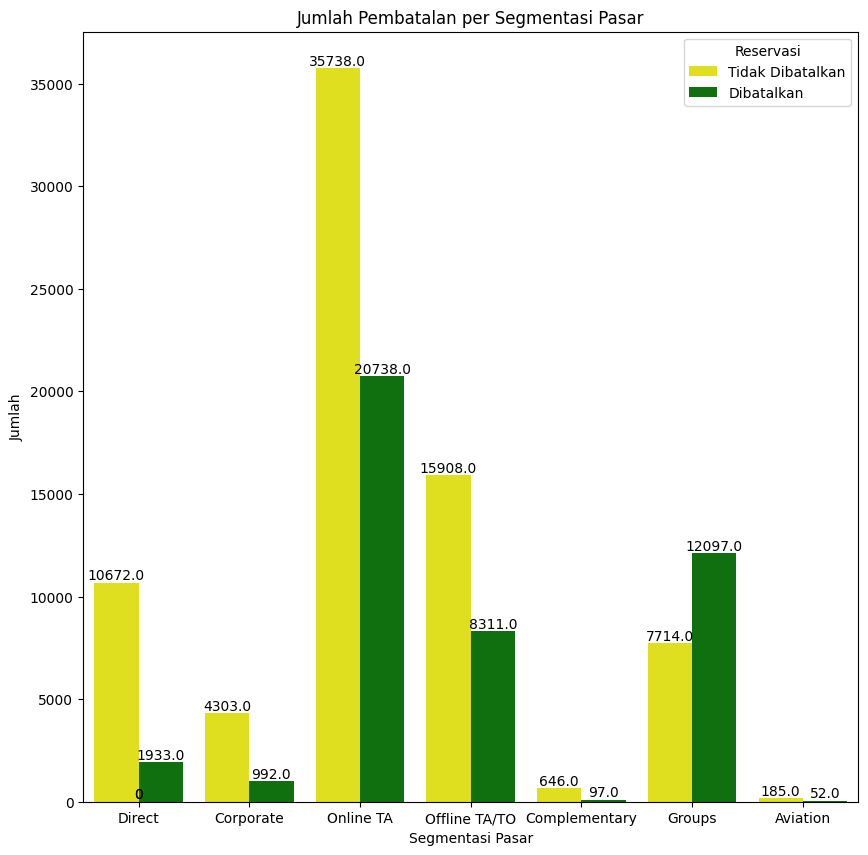

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='market_segment', hue='is_canceled', data=df2, palette=['yellow','green'])
plt.title('Jumlah Pembatalan per Segmentasi Pasar')
plt.xlabel('Segmentasi Pasar')
plt.ylabel('Jumlah')
plt.legend(title='Reservasi', labels=['Tidak Dibatalkan', 'Dibatalkan'])
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Berdasarkan segmentasi pasar, lebih banyak terjadi pembatalan reservasi melalui pemesanan Online TA(Agen Perjalanan)/TO(Operator Tur). Ini mengindikasikan bahwa pelanggan lebih mudah melakukan reservasi melalui online, namun juga lebih rentan untuk membatalkan reservasinya. Kemudian untuk reservasi oleh group lebih banyak melakukan pembatalan daripada reservasi yang tidak membatalkan. Ini dapat diasumsikan mungkin adanya ketidaksesuaian fasilitas/pelayanan yang ditawarkan khusus untuk pemesanan group atau mungkin kurangnya Hotel yang menyediakan kriteria yang diinginkan (asumsi terlepas dari adanya kesalahan pemesanan oleh individu).

In [ ]:
# Mengubah tipe data menjadi datetime
df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])

# Memisahkan menjadi kolom baru
df2['reservation_status_date_year'] = df2['reservation_status_date'].dt.year
df2['reservation_status_date_month'] = df2['reservation_status_date'].dt.month
df2['reservation_status_date_day'] = df2['reservation_status_date'].dt.day

In [ ]:
# Menggabungkan kolom month dan year
df2['month_year'] = df2['reservation_status_date_year'].astype(str) + '-' + df2['reservation_status_date_month'].astype(str)

# menghitung jumlah pembatalan per-bulan
Rev_stat_per_month_year=df2.groupby('month_year')['is_canceled'].value_counts().reset_index(name='total')
Rev_stat_per_month_year

,month_year,is_canceled,total
0,2014-10,1,180
1,2014-11,1,1
2,2015-1,1,948
3,2015-10,0,3304
4,2015-10,1,2438
...,...,...,...
56,2017-7,0,3336
57,2017-7,1,702
58,2017-8,0,3097
59,2017-8,1,320


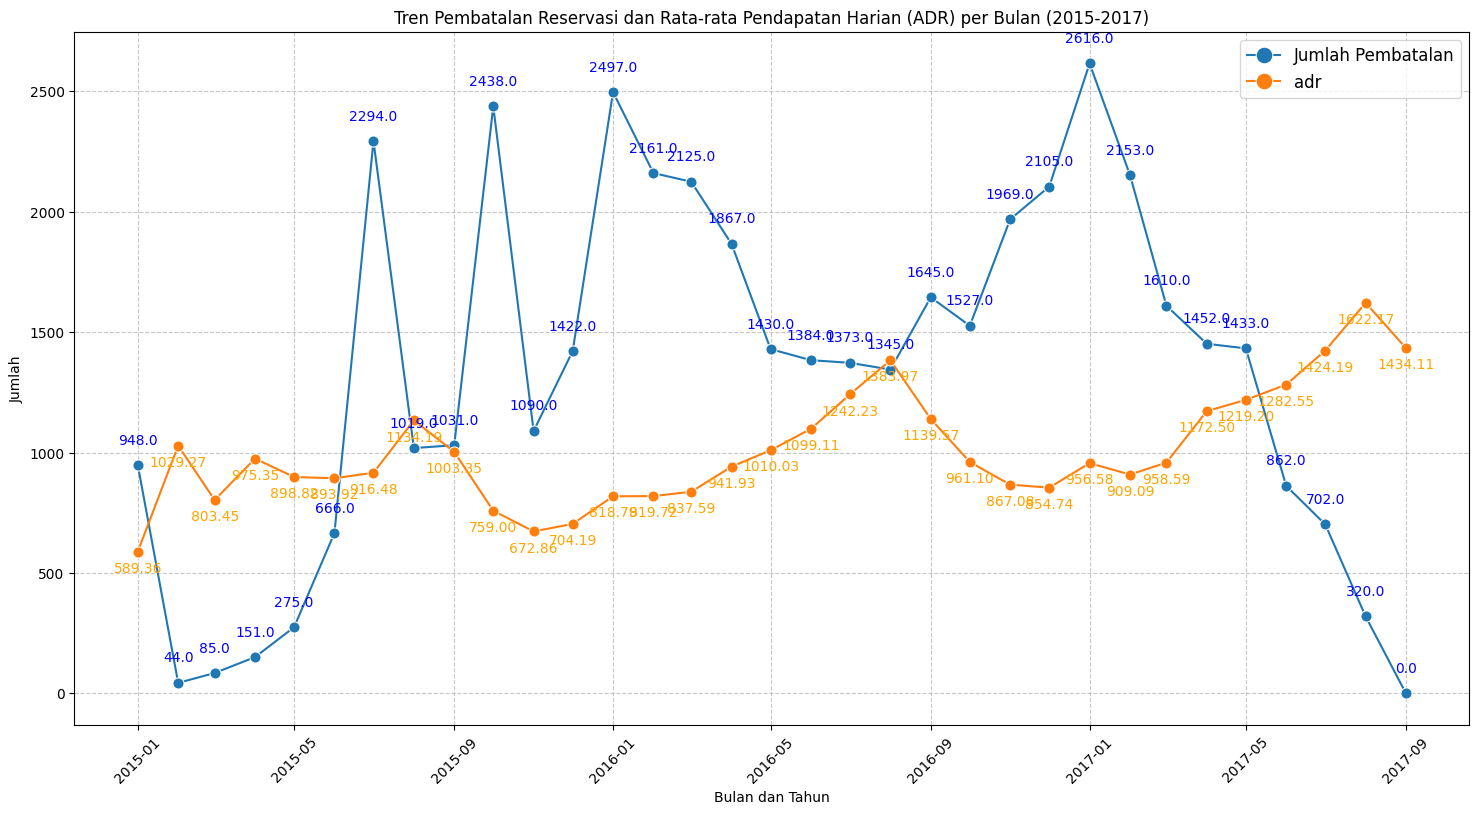

In [ ]:
# Tren pembatalan reservasi hotel July2015 - August2017 + ADR
# Filter data untuk tahun 2015-2017
df2 = df2[(df2['reservation_status_date_year'] >= 2015) & (df2['reservation_status_date_year'] <= 2017)]

# Hitung jumlah pemesanan dan pembatalan per bulan
df_monthly = df2.groupby('month_year').agg({'is_canceled': 'sum', 'adr': 'mean'}).reset_index()

# Konversi 'month_year' ke datetime
df_monthly['month_year'] = pd.to_datetime(df_monthly['month_year'], format='%Y-%m')

# Urutkan data berdasarkan 'month_year'
df_monthly = df_monthly.sort_values(by='month_year')

# Set 'month_year' sebagai index
df_monthly.set_index('month_year', inplace=True)

# Perbesar nilai ADR untuk memudahkan analisa
df_monthly['adr'] = df_monthly['adr'] * 10

# Buat line chart
plt.figure(figsize=(18,9))
sns.lineplot(x='month_year', y='is_canceled', data=df_monthly, label='Jumlah Pembatalan', marker='o', markersize=8)
sns.lineplot(x='month_year', y='adr', data=df_monthly, label='adr', marker='o', markersize=8)

# Anotasi untuk jumlah pembatalan
for i, row in df_monthly.iterrows():
    plt.annotate(f'{row["is_canceled"]}',
                 xy=(row.name, row['is_canceled']),
                 xytext=(0, 15), textcoords='offset points', ha='center',
                 color='blue') # Sesuaikan warna dengan warna garis

# Anotasi untuk ADR
for i, row in df_monthly.iterrows():
    plt.annotate(f'{row["adr"]:.2f}',
                 xy=(row.name, row['adr']),
                 xytext=(0, -15), textcoords='offset points', ha='center',
                 color='orange') # Sesuaikan warna dengan warna garis


plt.grid(linestyle='--', alpha=0.7)

plt.title('Tren Pembatalan Reservasi dan Rata-rata Pendapatan Harian (ADR) per Bulan (2015-2017)')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=12, markerscale=1.5)
plt.show()

**Tren Umum**

- Pembatalan: Terdapat fluktuasi yang cukup signifikan pada jumlah pembatalan dari bulan ke bulan. Ada beberapa puncak pembatalan yang terjadi secara periodik, yang mungkin mengindikasikan adanya faktor musiman atau peristiwa khusus yang mempengaruhi keputusan tamu untuk membatalkan reservasi.
- ADR: ADR juga menunjukkan fluktuasi, namun cenderung lebih stabil dibandingkan dengan jumlah pembatalan. Terdapat beberapa periode di mana ADR meningkat seiring dengan penurunan jumlah pembatalan, yang mungkin mengindikasikan bahwa tamu yang membayar lebih tinggi cenderung lebih berkomitmen pada reservasi mereka.

**Pola dan Hubungan**

- Musiman: Tampak adanya pola musiman pada kedua metrik. Jumlah pembatalan cenderung meningkat pada periode tertentu, seperti saat musim liburan atau saat ada event besar. Hal ini mengindikasikan bahwa faktor musiman memiliki pengaruh yang signifikan terhadap perilaku konsumen.
- Korelasi: Tidak ada korelasi yang jelas antara jumlah pembatalan dan ADR secara keseluruhan. Terdapat periode di mana keduanya bergerak searah, namun pada periode lain mereka bergerak berlawanan arah. Ini menunjukkan bahwa faktor-faktor lain selain harga juga mempengaruhi keputusan tamu untuk membatalkan reservasi.

In [ ]:
# Menganalisis asal negara yang melakukan pembatalan reservasi tertinggi (10 teratas)
canceled_data=df2[df2["is_canceled"]==1]
top_contry_canceled=canceled_data.groupby("country")["is_canceled"].sum().sort_values(ascending=False)[:10].reset_index(name="total")
top_contry_canceled

,country,total
0,PRT,27401
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


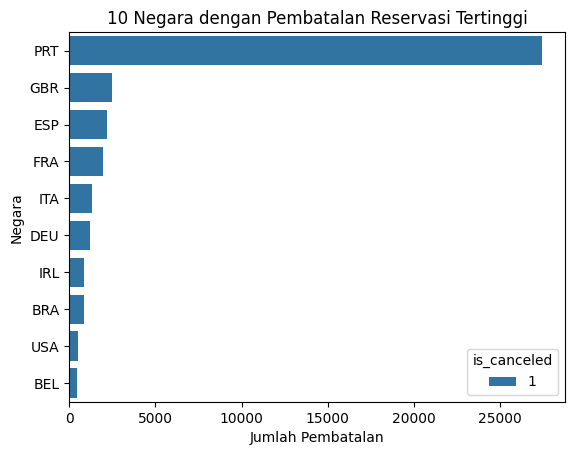

In [ ]:
# Membuat stacked bar chart
sns.countplot(y="country", hue="is_canceled", data=canceled_data, order=top_contry_canceled['country'])
plt.title("10 Negara dengan Pembatalan Reservasi Tertinggi")
plt.xlabel("Jumlah Pembatalan")
plt.ylabel("Negara")
plt.show()

### Feature Engineering

In [ ]:
df3 = df.copy()

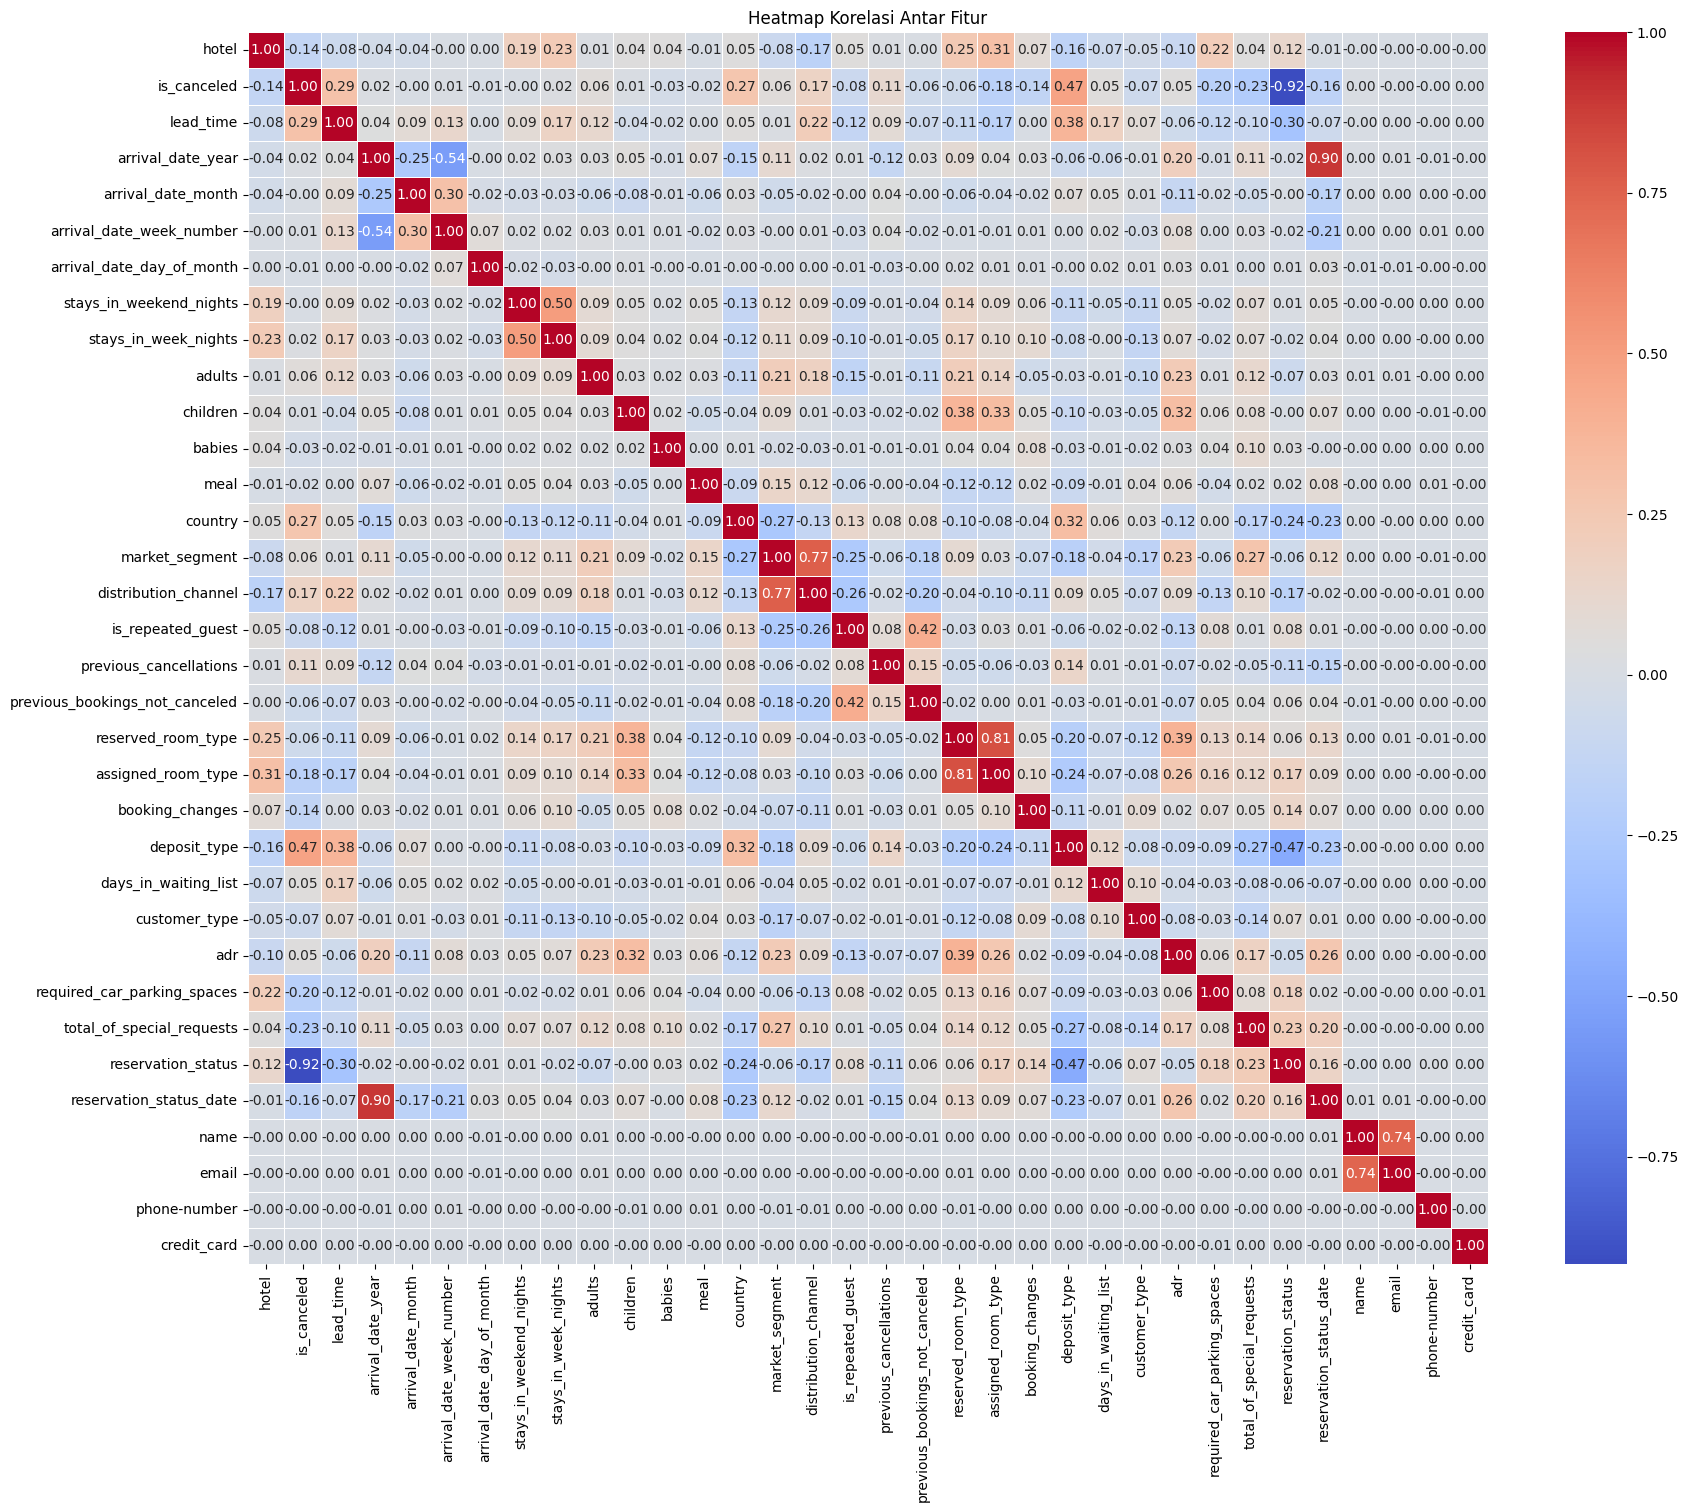

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Menentukan kolom yang memiliki data non-numerik
non_numerical_columns = df3.select_dtypes(include=['object']).columns

# Melakukan Label Encoding pada setiap kolom non-numerik
label_encoder = LabelEncoder()
for col in non_numerical_columns:
    df3[col] = label_encoder.fit_transform(df3[col])

# 3. Menghitung Matriks Korelasi
# Korelasi hanya dapat dihitung pada data numerik
correlation_matrix = df3.corr()

# 4. Membuat Heatmap
plt.figure(figsize=(20, 16))  # Menentukan ukuran gambar heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Fitur')

# Menampilkan heatmap
plt.show()

**Memahami Heatmap Korelasi**

Heatmap korelasi adalah visualisasi yang menunjukkan kekuatan dan arah hubungan antara variabel-variabel dalam suatu dataset. Warna pada heatmap merepresentasikan tingkat korelasi:

- Warna merah: Korelasi positif yang kuat (semakin merah, semakin kuat hubungan positifnya).
- Warna biru: Korelasi negatif yang kuat (semakin biru, semakin kuat hubungan negatifnya).
- Warna putih: Tidak ada korelasi atau korelasi yang sangat lemah.
Analisis Heatmap Korelasi untuk is_canceled

Fokus pada baris dan kolom yang terkait dengan is_canceled (TARGET). Berikut beberapa wawasan yang dapat kita tarik:

**Korelasi Positif:**
- lead_time: Semakin lama waktu antara pemesanan dan tanggal kedatangan, semakin tinggi kemungkinan pembatalan. Ini menunjukkan bahwa tamu yang memesan jauh-jauh hari cenderung lebih mudah membatalkan reservasi.
- previous_cancellations: Tamu yang memiliki riwayat pembatalan sebelumnya cenderung lebih sering membatalkan reservasi di masa depan.
- required_car_parking_spaces: Tamu yang membutuhkan tempat parkir cenderung lebih sering membatalkan reservasi. Ini bisa jadi karena terbatasnya ketersediaan tempat parkir atau karena adanya perubahan rencana perjalanan.

**Korelasi Negatif:**
- is_repeated_guest: Tamu yang pernah menginap sebelumnya cenderung lebih jarang membatalkan reservasi. Ini menunjukkan bahwa tamu yang loyal memiliki tingkat loyalitas yang lebih tinggi.
- total_of_special_requests: Tamu yang memiliki banyak permintaan khusus cenderung lebih jarang membatalkan reservasi. Ini mungkin karena hotel telah berusaha memenuhi permintaan khusus mereka, sehingga tamu merasa lebih terikat dengan reservasi.

**Wawasan Lainnya**
- Variabel yang Kurang Berpengaruh: Sebagian besar variabel lainnya memiliki korelasi yang sangat lemah atau tidak ada korelasi dengan is_canceled. Ini menunjukkan bahwa variabel-variabel tersebut mungkin tidak memiliki pengaruh signifikan terhadap keputusan tamu untuk membatalkan reservasi.
- Interaksi Antar Variabel: Heatmap juga dapat menunjukkan interaksi antara variabel-variabel. Misalnya, mungkin ada interaksi antara lead_time dan is_repeated_guest, di mana pengaruh lead_time terhadap pembatalan berbeda untuk tamu yang sering dan jarang menginap.

### Feature Multicollinearity Correction

In [ ]:
from sklearn.model_selection import train_test_split

feature = df3.drop(columns='is_canceled')
target = df3[['is_canceled']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42) # membagi data dengan perbandingan data training : testing (80:20)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,hotel,1.330792
2,lead_time,1.861895
3,arrival_date_year,35.433663
4,arrival_date_month,1.151291
5,arrival_date_week_number,6.184694
6,arrival_date_day_of_month,1.011908
7,stays_in_weekend_nights,1.380779
8,stays_in_week_nights,1.469440
9,adults,1.183030
10,children,1.245825


**Hasil cek korelasi antar fitur (> 0.7 threshold):**
- is_canceled dan reservation_status (-0.92)
- arrival_date_year dan reservation_status_date (0.90)
- market_segment dan distribution_channel	(0.77)
- reserved_room_type dan assigned_room_type	(0.81)
- name dan email (0.74)

**Hasil nilai vif score (> 5.0 threshold):**
- arrival_date_year (35.433663)
- arrival_date_week_number (6.184694)
- reservation_status_date (26.917475)

**Perimbangan langkah lanjutan menangani multikolinearitas:**
1. **Menghapus Fitur Redundan:** Dalam project ini saya bertujuan membangun model ml guna mencari dan memprediksi tamu yang berkemungkinan melakukan pembatalan reservasi hotel. Mungkin jika untuk mengidentifikasi faktor mengapa terjadi pembatalan reservasi berdasarkan dataset yang ada, kolom reservation_status memiliki informasi yang lebih kaya dengan adanya multi-kelas (lebih dari dua kelas). Namun, disini saya memutuskan untuk **menghapus kolom reservation_status** yang menyajikan informasi serupa dengan target is_canceled meski dalam bentuk yang berbeda. Maka saya **pertahankan is_canceled sebagai variabel target model ml** untuk memprediksi pembatalan reservasi. Kemudian saya memutuskan untuk **menghapus kolom fitur data privasi tamu seperti name, email, phone-number dan credit_card** karena dalam project ini saya tidak melakukan segmentasi dan saya menganggap keempat fitur ini tidak relevan untuk model prediksi sehingga bisa dihapus.

2. **Mengkombinasikan Fitur:** Membentuk fitur baru guna mencari 'waktu pemesanan', 'lama waktu tinggal', 'musim pembatalan', dll dengan kombinasi antara fitur-fitur yang mewakili tanggal (date) baik kedatangan (arrival), status_reservasi_date (canceled or check-out). Diharapkan bisa mengurangi fitur yang tidak perlu dan menghasilkan fitur yang lebih relevan.

3. **Pengurangan Dimensi:** Jika masih banyak fitur yang berkorelasi, maka akan dipertimbangkan untuk mengurangi dimensi dataset dengan PCA maupun FA.

4. **Seleksi Fitur:** Memilih fitur yang berkorelasi tinggi dengan variabel target is_canceled karena dianggap memberikan informasi yang lebih relevan.

5. **Analisis lebih lanjut:** menggunakan visualisasi seperti scatter plot atau pair plot untuk melihat hubungan antar fitur secara lebih detail serta pemahaman mendalam seputar bisnis perhotelan.

### Feature Processing

In [ ]:
df4 = df.copy()

In [ ]:
df4 = df4.drop(columns=['reservation_status']) # menghapus fitur redundan  yang sama dengan target
df4 = df4.drop(columns=['name','email','phone-number','credit_card']) # menghapus fitur data privasi
df4 = df4.drop(columns=['arrival_date_year']) # menghapus fitur redundan  yang sama dengan 'arrival_date_month' dan 'arrival_date_week_number'
df4 = df4.drop(columns=['market_segment']) # menghapus fitur redundan  yang sama dengan 'distribution_channel'
df4 = df4.drop(columns=['reserved_room_type']) # menghapus fitur redundan  yang sama dengan 'assigned_room_type'

In [ ]:
# Cek korelasi hasil reduksi fitur secara manual
from sklearn.preprocessing import LabelEncoder

# Menentukan kolom yang memiliki data non-numerik
non_numerical_columns3 = df4.select_dtypes(include=['object']).columns

# Melakukan Label Encoding pada setiap kolom non-numerik
label_encoder = LabelEncoder()
for col in non_numerical_columns3:
    df4[col] = label_encoder.fit_transform(df4[col])

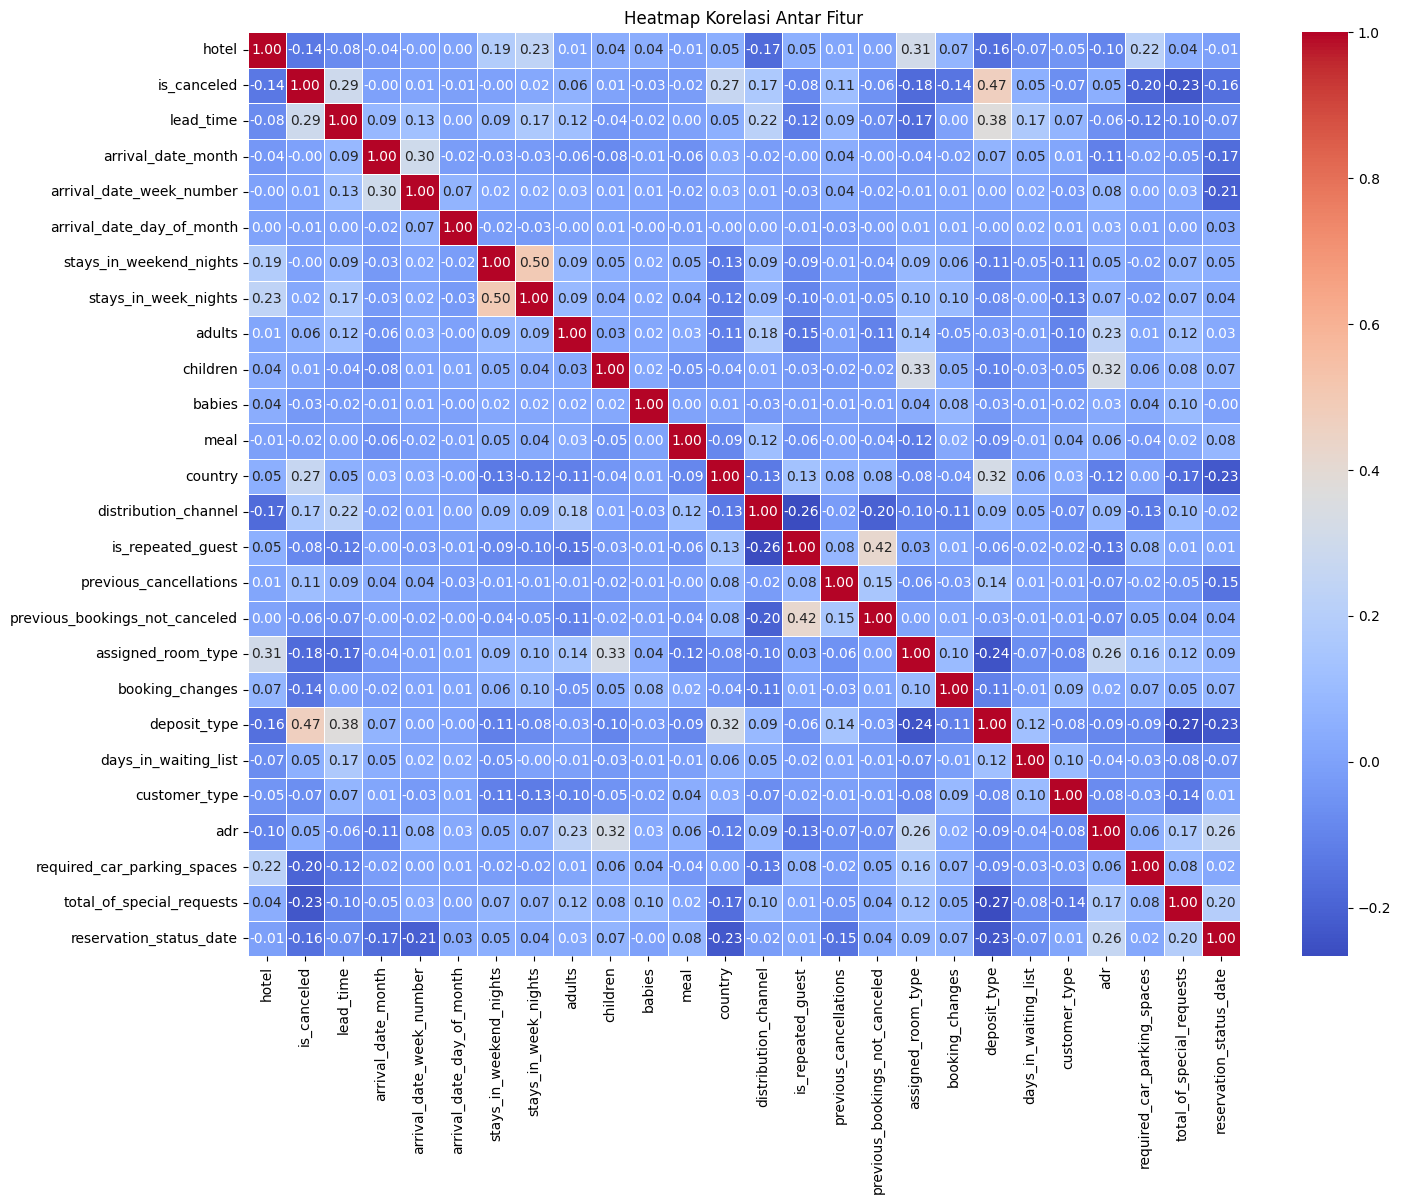

In [ ]:
# Korelasi hanya dapat dihitung pada data numerik
correlation_matrix = df4.corr()

# Membuat Heatmap
plt.figure(figsize=(16, 12))  # Menentukan ukuran gambar heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Fitur')

# Menampilkan heatmap
plt.show()

Dapat diperhatikan bahwa sudah tidak ada fitur yang berkorelasi tinggi. **(Threshold > 0.8)**

In [ ]:
from sklearn.model_selection import train_test_split

feature = df4.drop(columns='is_canceled')
target = df4[['is_canceled']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42) # membagi data dengan perbandingan data training : testing (80:20)

In [ ]:
# Check VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,hotel,1.325703
2,lead_time,1.404254
3,arrival_date_month,1.148779
4,arrival_date_week_number,1.206833
5,arrival_date_day_of_month,1.011333
6,stays_in_weekend_nights,1.371725
7,stays_in_week_nights,1.457261
8,adults,1.169085
9,children,1.219985
10,babies,1.019873


Hasil VIF Score menunjukkan tidak ada korelasi yang tinggi antar-fitur **(Treshold > 5.0)**. Maka hasil dataset ini bisa diproses ke dalam model.

## Model Training

Model yang akan digunakan dalam analisis:
- Logistic Regression (Based Model)
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

In [ ]:
df_manual = df.copy()

In [ ]:
df_manual = df_manual.drop(columns=['reservation_status']) # menghapus fitur redundan  yang sama dengan target
df_manual = df_manual.drop(columns=['name','email','phone-number','credit_card']) # menghapus fitur data privasi
df_manual = df_manual.drop(columns=['arrival_date_year']) # menghapus fitur redundan  yang sama dengan 'arrival_date_month' dan 'arrival_date_week_number'
df_manual = df_manual.drop(columns=['market_segment']) # menghapus fitur redundan  yang sama dengan 'distribution_channel'
df_manual = df_manual.drop(columns=['reserved_room_type']) # menghapus fitur redundan  yang sama dengan 'assigned_room_type'

In [ ]:
df_manual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_month              119386 non-null  object 
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   stays_in_weekend_nights         119386 non-null  int64  
 7   stays_in_week_nights            119386 non-null  int64  
 8   adults                          119386 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119386 non-null  int64  
 11  meal                            119386 non-null  object 
 12  country              

### Split Dataset : Train-Test

In [ ]:
# Split Data
from sklearn.model_selection import train_test_split

feature = df_manual.drop(columns='is_canceled')
target = df_manual[['is_canceled']]

# splitting: train and test (80:20)
feature_admit_train, feature_admit_test, target_admit_train, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_admit_train.shape, feature_admit_test.shape, target_admit_train.shape, target_admit_test.shape

((95508, 25), (23878, 25), (95508, 1), (23878, 1))

In [ ]:
cancel_count = target_admit_train.value_counts()
cancel_count

,count
is_canceled,
0,60193
1,35315


### Categorical Encoding + Standarisasi

In [ ]:
# Separate numerical and categorical columns
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']
numerical_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']

In [ ]:
# Frequency Encoding dan Standarisasi
from sklearn.preprocessing import StandardScaler

# Fungsi untuk frekuensi encoding
def frequency_encoding(data, categorical_cols):
    for col in categorical_cols:
        freq = data[col].value_counts(normalize=True)
        data[col + '_freq'] = data[col].map(freq)
    return data

# Frekuensi encoding pada data train dan test
X_train_encoded = frequency_encoding(feature_admit_train, categorical_cols)
X_test_encoded = frequency_encoding(feature_admit_test, categorical_cols)

# Standarisasi pada data train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded[numerical_cols + [col + '_freq' for col in categorical_cols]])

# Simpan scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Standarisasi pada data test
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_test_scaled = scaler.transform(X_test_encoded[numerical_cols + [col + '_freq' for col in categorical_cols]])

Untuk Categorical Encoding disini digunakan frequency encoding untuk mencari frekuensi kemunculan data pada setiap kolom fitur. Tidak seperti penggunaan Label Encoding sebelumnya untuk mencari korelasi antar-fitur, namun untuk pemakaian dalam model machine learning dimana tidak ada data yang bersifat ordinal (memiliki urutan atau peringkat).

Dibandingkan menggunakan One-Hot Encoding yang berpotensi menambah lonjakan kolom fitur sehingga memengaruhi komputasi model dan berpotensi overfitting, maka dengan frequency encoding hal ini dapat diminimalisir serta memiliki efisiensi, kompabilitas dan fleksibilitas yang lebih baik dalam analisis data.

In [ ]:
X_train_scaled

array([[ 0.54240864, -0.673372  , -1.11399145, ..., -2.65998134,
         0.57118803,  0.11986361],
       [-0.36457488,  0.0612878 , -0.65866408, ...,  0.37502958,
         0.57118803, -0.31662504],
       [ 1.40264044,  0.86941358,  0.93498174, ..., -2.65998134,
         0.57118803, -0.26119791],
       ...,
       [-0.00926175,  1.89793731,  1.27647727, ...,  0.37502958,
         0.57118803, -0.38590896],
       [ 0.24319759,  0.28168574, -1.68315067, ...,  0.37502958,
         0.57118803, -0.86396795],
       [-0.82274181,  0.28168574,  1.73180464, ...,  0.37502958,
        -1.6071875 , -0.77389887]])

In [ ]:
X_test_scaled

array([[ 0.92577281,  1.60407338, -1.56931883, ...,  0.37100855,
         0.56861325,  0.2098793 ],
       [-0.205619  ,  0.13475378,  0.02432699, ...,  0.37100855,
         0.56861325, -0.73234245],
       [ 0.16839482, -0.89376994, -0.2033367 , ...,  0.37100855,
         0.56861325,  0.04360488],
       ...,
       [-0.59833352, -1.7753617 ,  0.02432699, ...,  0.37100855,
        -1.6065899 ,  0.57014056],
       [-0.962997  ,  0.7959476 , -0.2033367 , ...,  0.37100855,
        -1.6065899 ,  0.26530411],
       [ 0.60786106, -0.74683798,  0.70731805, ...,  0.37100855,
        -1.6065899 , -0.34436878]])

### Define Model

In [ ]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

# Membuat model Logistic Regression
logreg = LogisticRegression(random_state=42)

In [ ]:
# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

In [ ]:
# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
rf = RandomForestClassifier(random_state=42)

In [ ]:
# 4. SVM
from sklearn.svm import SVC, LinearSVC

SVM = SVC() # default kernel rbf, c = 1.0

### Evaluasi tanpa Hyperparameter Tuning + Cross Validation

In [ ]:
# Mengubah bentuk kolom target menjadi array 1D
y_admit_train = target_admit_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

y_admit_test = target_admit_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [ ]:
# 1. Logistic Regression
logreg.fit(X_train_scaled, y_admit_train)
y_train1 = logreg.predict(X_train_scaled)
y_pred1 = logreg.predict(X_test_scaled)

In [ ]:
# classification report Logistic Regression
from sklearn.metrics import classification_report
print("TRAIN LogReg:")
print(classification_report(y_admit_train, y_train1))
print("TEST LogReg:")
print(classification_report(y_admit_test, y_pred1))

TRAIN LogReg:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     60193
           1       0.82      0.58      0.68     35315

    accuracy                           0.80     95508
   macro avg       0.80      0.75      0.77     95508
weighted avg       0.80      0.80      0.79     95508

TEST LogReg:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14973
           1       0.82      0.58      0.68      8905

    accuracy                           0.80     23878
   macro avg       0.80      0.75      0.76     23878
weighted avg       0.80      0.80      0.79     23878



In [ ]:
# 2. Decision Tree
dtree.fit(X_train_scaled, y_admit_train)
y_train2 = dtree.predict(X_train_scaled)
y_pred2 = dtree.predict(X_test_scaled)

In [ ]:
# classification report Decision Tree
print("TRAIN DecisionTree:")
print(classification_report(y_admit_train, y_train2))
print("TEST DecisionTree:")
print(classification_report(y_admit_test, y_pred2))

TRAIN DecisionTree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60193
           1       1.00      1.00      1.00     35315

    accuracy                           1.00     95508
   macro avg       1.00      1.00      1.00     95508
weighted avg       1.00      1.00      1.00     95508

TEST DecisionTree:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     14973
           1       0.74      0.78      0.76      8905

    accuracy                           0.82     23878
   macro avg       0.80      0.81      0.81     23878
weighted avg       0.82      0.82      0.82     23878



In [ ]:
# 3. Random Forest
rf.fit(X_train_scaled, y_admit_train)
y_train3 = rf.predict(X_train_scaled)
y_pred3 = rf.predict(X_test_scaled)

In [ ]:
# classification report Random Forest
print("TRAIN RandomForest:")
print(classification_report(y_admit_train, y_train3))
print("TEST RandomForest:")
print(classification_report(y_admit_test, y_pred3))

TRAIN RandomForest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60193
           1       1.00      1.00      1.00     35315

    accuracy                           1.00     95508
   macro avg       1.00      1.00      1.00     95508
weighted avg       1.00      1.00      1.00     95508

TEST RandomForest:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     14973
           1       0.88      0.79      0.84      8905

    accuracy                           0.88     23878
   macro avg       0.88      0.87      0.87     23878
weighted avg       0.88      0.88      0.88     23878



In [ ]:
# 4. SVM
SVM.fit(X_train_scaled, y_admit_train)
y_train4 = SVM.predict(X_train_scaled)
y_pred4 = SVM.predict(X_test_scaled)

In [ ]:
# classification report SVM
print("TRAIN SVM:")
print(classification_report(y_admit_train, y_train4))
print("TEST SVM:")
print(classification_report(y_admit_test, y_pred4))

TRAIN SVM:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     60193
           1       0.87      0.70      0.78     35315

    accuracy                           0.85     95508
   macro avg       0.86      0.82      0.83     95508
weighted avg       0.85      0.85      0.85     95508

TEST SVM:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     14973
           1       0.86      0.70      0.77      8905

    accuracy                           0.85     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.85      0.85      0.84     23878



### Hyperparameter Tuning + Cross Validation

In [ ]:
# 1. Logistic Regression
from sklearn.model_selection import GridSearchCV

# Mendefinisikan parameter yang akan di-tune
param_grid1 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': [None, 'l1', 'l2']
}

# Membuat objek GridSearchCV + k-fold cross_validation
search_lr = GridSearchCV(logreg, param_grid1, cv=5, scoring='recall')
# Melatih model dengan GridSearchCV
search_lr.fit(X_train_scaled, y_admit_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': [None, 'l1', 'l2']},
             scoring='recall')

In [ ]:
# results for logistic regression
cv_result = pd.DataFrame(search_lr.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'penalty': None}",0.580915,1
15,"{'C': 100, 'penalty': None}",0.580915,1
12,"{'C': 10, 'penalty': None}",0.580915,1
3,"{'C': 0.01, 'penalty': None}",0.580915,1
9,"{'C': 1, 'penalty': None}",0.580915,1
6,"{'C': 0.1, 'penalty': None}",0.580915,1
17,"{'C': 100, 'penalty': 'l2'}",0.580886,7
14,"{'C': 10, 'penalty': 'l2'}",0.580858,8
11,"{'C': 1, 'penalty': 'l2'}",0.580688,9
8,"{'C': 0.1, 'penalty': 'l2'}",0.580037,10


**Hyperparameter yang umum di-tune pada Logistic Regression adalah:**

- C: Parameter regularisasi yang mengontrol kekuatan regularisasi L2. Nilai C yang lebih kecil menunjukkan regularisasi yang lebih kuat, membantu mencegah overfitting.
- penalty: Jenis regularisasi yang digunakan. Opsi umum adalah 'l1' (L1 regularization) atau 'l2' (L2 regularization).
- solver: Algoritma optimasi yang digunakan untuk mencari koefisien model. Pilihan yang umum termasuk 'liblinear', 'saga', 'lbfgs', dan 'newton-cg'.

In [ ]:
y_train11 = search_lr.best_estimator_.predict(X_train_scaled)
y_pred11 = search_lr.best_estimator_.predict(X_test_scaled)

In [ ]:
# classification report Logistic Regression
from sklearn.metrics import classification_report
print("TRAIN LogReg:")
print(classification_report(y_admit_train, y_train11))
print("TEST LogReg:")
print(classification_report(y_admit_test, y_pred11))

TRAIN LogReg:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     60193
           1       0.82      0.58      0.68     35315

    accuracy                           0.80     95508
   macro avg       0.80      0.75      0.77     95508
weighted avg       0.80      0.80      0.79     95508

TEST LogReg:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14973
           1       0.82      0.58      0.68      8905

    accuracy                           0.80     23878
   macro avg       0.80      0.75      0.76     23878
weighted avg       0.80      0.80      0.79     23878



In [ ]:
# Konversi sementara ke DataFrame untuk memudahkan interpretasi
df = pd.DataFrame(X_test_scaled, columns=['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list',
        'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date'])

# Mendapatkan koefisien regresi
coefs = search_lr.best_estimator_.coef_[0]

# Membuat DataFrame untuk menampilkan feature importance
feature_importance = pd.DataFrame({'feature': df.columns, 'coef': coefs})
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
print(feature_importance)

                           feature      coef
9                           babies  1.889090
19            days_in_waiting_list  0.672589
23       total_of_special_requests  0.595910
13               is_repeated_guest  0.488867
0                            hotel  0.484737
20                   customer_type  0.359940
24         reservation_status_date  0.319931
21                             adr  0.273574
4        arrival_date_day_of_month  0.117282
5          stays_in_weekend_nights  0.096075
6             stays_in_week_nights  0.089326
16              assigned_room_type  0.074279
3         arrival_date_week_number  0.066846
18                    deposit_type  0.028998
2               arrival_date_month -0.005995
7                           adults -0.013200
1                        lead_time -0.046186
12            distribution_channel -0.076475
17                 booking_changes -0.139854
8                         children -0.164255
11                         country -0.221305
15  previo

In [ ]:
# 2. Decision Tree
# Definisikan parameter yang ingin di-tuning
param_grid2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

# Membuat objek GridSearchCV + k-fold cross_validation
search_dt = GridSearchCV(dtree, param_grid2, cv=5, scoring='recall')
# Melatih model dengan GridSearchCV
search_dt.fit(X_train_scaled, y_admit_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20]},
             scoring='recall')

In [ ]:
# results for Decision Tree
cv_result2 = pd.DataFrame(search_dt.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result2[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
135,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.744868,1
136,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.744868,1
138,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.743254,3
139,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.743254,3
140,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.743254,3
...,...,...,...
105,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.372221,153
20,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.371825,159
21,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.371117,160
23,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.371117,160


**Hyperparameter yang umum di-tune pada Decision Tree adalah:**

- criterion: 'gini' atau 'entropy' umumnya memberikan hasil yang baik.
- max_depth: Mulai dengan nilai yang lebih rendah (misalnya, 5 atau 10) untuk menghindari overfitting, terutama jika data memiliki noise.
Tingkatkan secara bertahap untuk melihat apakah kinerja model membaik.
- min_samples_split: Nilai yang lebih tinggi (misalnya, 10 atau 20) dapat membantu mencegah overfitting, terutama jika jumlah sampel tidak terlalu banyak.
- min_samples_leaf: Nilai yang lebih tinggi (misalnya, 5 atau 10) dapat membuat pohon lebih sederhana dan mengurangi risiko overfitting.
- max_features:'sqrt' atau 'log2' adalah pilihan yang baik untuk memulai. Ini akan membatasi jumlah fitur yang dipertimbangkan pada setiap split, sehingga dapat mengurangi waktu komputasi dan overfitting.
- splitter: 'best' biasanya memberikan hasil yang lebih baik, tetapi bisa lebih lambat.

In [ ]:
y_train22 = search_dt.best_estimator_.predict(X_train_scaled)
y_pred22 = search_dt.best_estimator_.predict(X_test_scaled)

In [ ]:
# classification report Decision Tree
print("TRAIN DecisionTree:")
print(classification_report(y_admit_train, y_train22))
print("TEST DecisionTree:")
print(classification_report(y_admit_test, y_pred22))

TRAIN DecisionTree:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     60193
           1       0.85      0.76      0.80     35315

    accuracy                           0.86     95508
   macro avg       0.86      0.84      0.85     95508
weighted avg       0.86      0.86      0.86     95508

TEST DecisionTree:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     14973
           1       0.80      0.73      0.76      8905

    accuracy                           0.83     23878
   macro avg       0.83      0.81      0.82     23878
weighted avg       0.83      0.83      0.83     23878



In [ ]:
# Mendapatkan nilai importance dari setiap fitur
importances = search_dt.best_estimator_.feature_importances_

# Membuat DataFrame untuk menampilkan feature importance
feature_importances2 = pd.DataFrame({'feature': df.columns, 'importance': importances})
feature_importances2 = feature_importances2.sort_values('importance', ascending=False)
print(feature_importances2)

                           feature  importance
22     required_car_parking_spaces    0.345443
0                            hotel    0.088745
23       total_of_special_requests    0.086908
13               is_repeated_guest    0.072846
19            days_in_waiting_list    0.071216
14          previous_cancellations    0.056842
24         reservation_status_date    0.046677
15  previous_bookings_not_canceled    0.031760
9                           babies    0.031364
1                        lead_time    0.028406
20                   customer_type    0.020597
18                    deposit_type    0.016188
2               arrival_date_month    0.014247
17                 booking_changes    0.013933
11                         country    0.013732
4        arrival_date_day_of_month    0.013559
21                             adr    0.012311
10                            meal    0.010131
16              assigned_room_type    0.010128
3         arrival_date_week_number    0.006317
5          st

In [ ]:
# 3. Random Forest
# Definisikan parameter yang ingin di-tuning
param_grid3 = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV + k-fold cross_validation
search_rf = GridSearchCV(rf, param_grid3, cv=5, scoring='recall')
# Melatih model dengan GridSearchCV
search_rf.fit(X_train_scaled, y_admit_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='recall')

In [ ]:
# results for Random Forest
cv_result3 = pd.DataFrame(search_rf.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result3[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.794592,1
2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.792723,2
6,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.792100,3
7,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.791817,4
5,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.789948,5
...,...,...,...
55,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.382897,136
59,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.382897,136
67,"{'max_depth': 2, 'min_samples_leaf': 4, 'min_s...",0.382897,136
63,"{'max_depth': 2, 'min_samples_leaf': 4, 'min_s...",0.382897,136


In [ ]:
y_train33 = search_rf.best_estimator_.predict(X_train_scaled)
y_pred33 = search_rf.best_estimator_.predict(X_test_scaled)

In [ ]:
# classification report Random Forest
print("TRAIN RandomForest:")
print(classification_report(y_admit_train, y_train33))
print("TEST RandomForest:")
print(classification_report(y_admit_test, y_pred33))

TRAIN RandomForest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60193
           1       1.00      1.00      1.00     35315

    accuracy                           1.00     95508
   macro avg       1.00      1.00      1.00     95508
weighted avg       1.00      1.00      1.00     95508

TEST RandomForest:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     14973
           1       0.88      0.79      0.84      8905

    accuracy                           0.88     23878
   macro avg       0.88      0.87      0.87     23878
weighted avg       0.88      0.88      0.88     23878



In [ ]:
# Mendapatkan nilai importance dari setiap fitur
importances = search_rf.best_estimator_.feature_importances_

# Membuat DataFrame untuk menampilkan feature importance
feature_importances3 = pd.DataFrame({'feature': df.columns, 'importance': importances})
feature_importances3 = feature_importances3.sort_values('importance', ascending=False)
print(feature_importances3)

                           feature  importance
0                            hotel    0.125690
24         reservation_status_date    0.113711
22     required_car_parking_spaces    0.110390
19            days_in_waiting_list    0.101250
13               is_repeated_guest    0.091132
1                        lead_time    0.056271
2               arrival_date_month    0.054022
15  previous_bookings_not_canceled    0.041184
23       total_of_special_requests    0.035726
4        arrival_date_day_of_month    0.034695
17                 booking_changes    0.032512
9                           babies    0.032385
21                             adr    0.026145
3         arrival_date_week_number    0.022625
14          previous_cancellations    0.022223
20                   customer_type    0.021431
11                         country    0.020209
18                    deposit_type    0.015440
5          stays_in_weekend_nights    0.012892
16              assigned_room_type    0.011699
6            

In [ ]:
# 4. SVM
from sklearn.model_selection import RandomizedSearchCV
# Definisikan parameter yang ingin di-tuning
param_grid4 = {'C': [1, 10, 100],
               'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
               #'gamma': [0.1, 1, 10]
}

# Membuat objek GridSearchCV + k-fold cross_validation
search_svm = RandomizedSearchCV(SVM, param_grid4, cv=5, scoring='recall')
# Melatih model dengan GridSearchCV
search_svm.fit(X_train_scaled, y_admit_train)

KeyboardInterrupt: 

In [ ]:
# results for SVM
cv_result4 = pd.DataFrame(search_svm.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result4[retain_cols].sort_values('rank_test_score')

In [ ]:
y_train44 = search_svm.best_estimator_.predict(X_train_scaled)
y_pred44 = search_svm.best_estimator_.predict(X_test_scaled)

In [ ]:
# classification report SVM
print("TRAIN SVM:")
print(classification_report(y_admit_train, y_train44))
print("TEST SVM:")
print(classification_report(y_admit_test, y_pred44))

In [ ]:
from sklearn.feature_selection import RFE

# Mendapatkan model terbaik
best_model = search_svm.best_estimator_

# Menggunakan RFE untuk menentukan feature importance
rfe = RFE(best_model, n_features_to_select=10)  # Pilih jumlah fitur yang ingin dipertahankan
rfe.fit(X_train_scaled, y_admit_train)
print(rfe.support_)  # True untuk fitur yang terpilih, False untuk fitur yang tidak terpilih

### Confusion Matrix

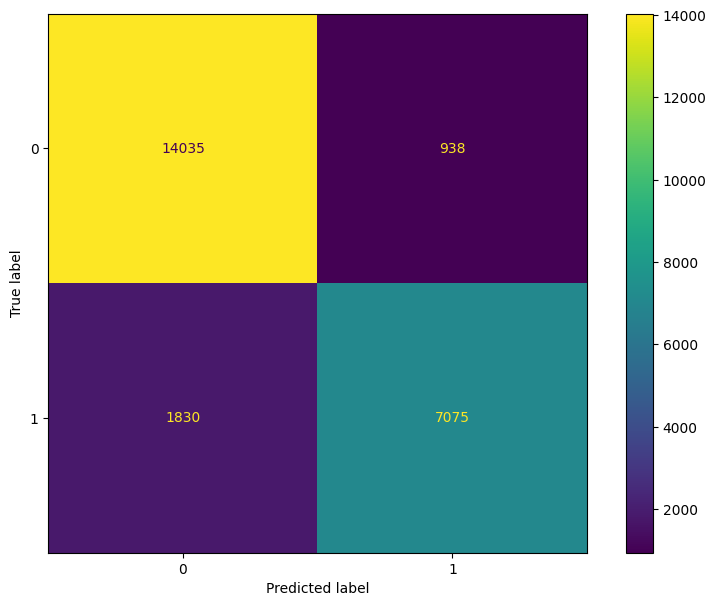

In [ ]:
# Best Model : Random Forest
# Hasil dengan Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_admit_test, y_pred3, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)
disp.plot(ax=ax)
plt.show()

## Kesimpulan

- Hasil prediksi target yakni pembatalan reservasi hotel lebih mudah dikenali melalui Model Random Forest dengan ketepatan prediksi 79% (Recall).
- Hasil Tuning Parameter dari masing-masing model terbukti mampu meningkatkan hasil prediksi terhadap pembatalan reservasi pada testing data sebagai berikut (Recall):
1. Logistic Regression : 0.58 (Baseline)
2. Decision Forest: 0.73
3. **Random Forest: 0.79**
4. Support Vector Machine: 0.70
- Fitur kunci berdasarkan hasil model untuk memprediksi pembatalan reservasi lebih mengarah pada beberapa faktor berikut:
1. **Ketersediaan fasilitas:** required_car_parking_spaces dan total_of_special_requests.
2. **Manajemen Riwayat Pemesanan:** reservation_status_date, days_in_waiting_list dan is_repeated_guest.

## Rekomendasi

- Penerapan program loyalitas seperti memberikan penawaran khusus, diskon, atau upgrade kamar secara eksklusif untuk tamu loyal dan melakukan komunikasi yang lebih personal.
- Optimalkan pelayanan terutama pada musim atau waktu liburan.
- Melakukan pelatihan untuk staf demi memberikan pelayanan yang lebih baik, ramah, dan proaktif. Memperhatikan detail kecil yang dapat meningkatkan kepuasan tamu, seperti penyediaan fasilitas tambahan atau perlakuan khusus. Serta manajemen komplain yang cepat dan efektif untuk meminimalisir dampak negatif terhadap reputasi hotel.
- Mengulas kembali kebijakan pembatalan untuk menawarkan opsi pembatalan yang lebih fleksibel, terutama untuk tamu loyal.
- Berikan insentif kepada tamu yang merekomendasikan hotel kepada teman atau keluarga serta melakukan survei secara berkala untuk mendapatkan feedback langsung dari tamu.
- Pertimbangkan potensi pemakaian media sosial untuk berinteraksi dengan tamu dan membangun komunitas.


# **Terima Kasih**